In [9]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configurar a semente aleatória para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

In [10]:

#####################################
# Parte 1: Preparação dos Dados
#####################################

# Criar um dataset sintético para regressão
# make_regression gera um conjunto de dados para problemas de regressão
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape para formato compatível com PyTorch (N, 1)

# Dividir em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
# A normalização é importante para o treinamento eficiente de redes neurais
scaler_X = StandardScaler()
scaler_y = StandardScaler()  # Também normalizamos o alvo em problemas de regressão
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Converter para tensores PyTorch
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [11]:
#####################################
# Parte 2: Definição da Rede Neural
#####################################

# Definir a classe da rede neural
class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        """
        Inicializa a arquitetura da rede neural para regressão.
        
        Parâmetros:
        input_size (int): Número de features de entrada
        hidden_size1 (int): Número de neurônios na primeira camada oculta
        hidden_size2 (int): Número de neurônios na segunda camada oculta
        output_size (int): Número de valores de saída (1 para regressão simples)
        """
        super(RegressionNet, self).__init__()
        
        # Primeira camada oculta
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        
        # Segunda camada oculta
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        
        # Camada de saída
        self.fc3 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, x):
        """
        Define a passagem para frente (forward pass) através da rede.
        
        Parâmetros:
        x (Tensor): Tensor de entrada
        
        Retorna:
        Tensor: Saída da rede neural
        """
        # Propagação para frente
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [12]:
#####################################
# Parte 3: Treinamento do Modelo
#####################################

# Hiperparâmetros
input_size = 10  # Número de features de entrada
hidden_size1 = 32  # Tamanho da primeira camada oculta
hidden_size2 = 16  # Tamanho da segunda camada oculta
output_size = 1  # Um valor para regressão simples
learning_rate = 0.01  # Taxa de aprendizado
num_epochs = 100  # Número de épocas de treinamento

# Instanciar o modelo
model = RegressionNet(input_size, hidden_size1, hidden_size2, output_size)

# Definir a função de perda (MSE para problemas de regressão)
criterion = nn.MSELoss()

# Definir o otimizador (Adam é uma boa escolha para muitos problemas)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lista para armazenar as perdas ao longo do treinamento
train_losses = []

# Loop de treinamento
print("Treinando modelo de regressão...")
for epoch in range(num_epochs):
    # Definir o modelo para modo de treinamento
    model.train()
    
    # Forward pass - propagar os dados através da rede
    outputs = model(X_train_tensor)
    
    # Calcular a perda (erro)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass e otimização
    optimizer.zero_grad()  # Zerar os gradientes acumulados
    loss.backward()  # Calcular os gradientes
    optimizer.step()  # Atualizar os pesos
    
    # Armazenar a perda para visualização posterior
    train_losses.append(loss.item())
    
    # Imprimir a perda a cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Treinando modelo de regressão...
Epoch [10/100], Loss: 0.3340
Epoch [20/100], Loss: 0.1159
Epoch [30/100], Loss: 0.0307
Epoch [40/100], Loss: 0.0193
Epoch [50/100], Loss: 0.0075
Epoch [60/100], Loss: 0.0045
Epoch [70/100], Loss: 0.0032
Epoch [80/100], Loss: 0.0024
Epoch [90/100], Loss: 0.0020
Epoch [100/100], Loss: 0.0017


Erro quadrático médio no conjunto de teste: 0.0029


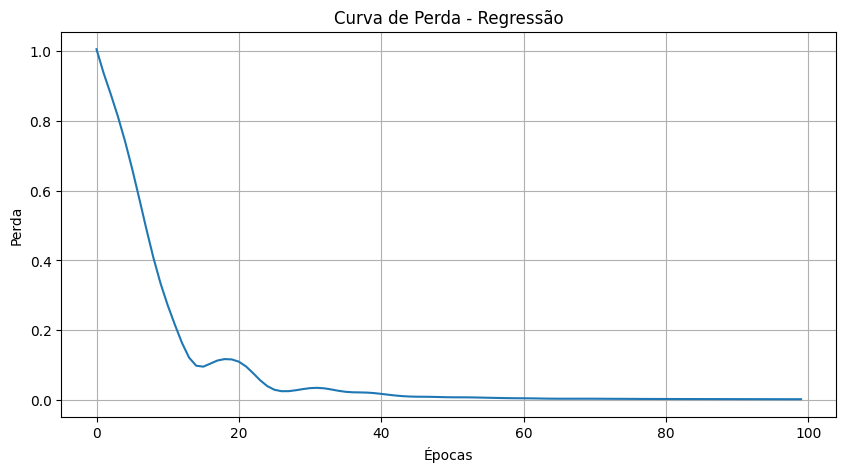

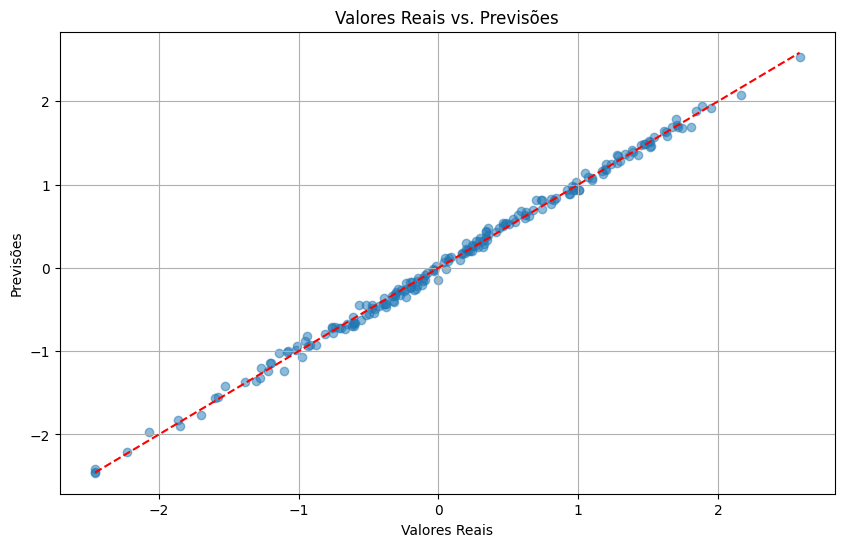

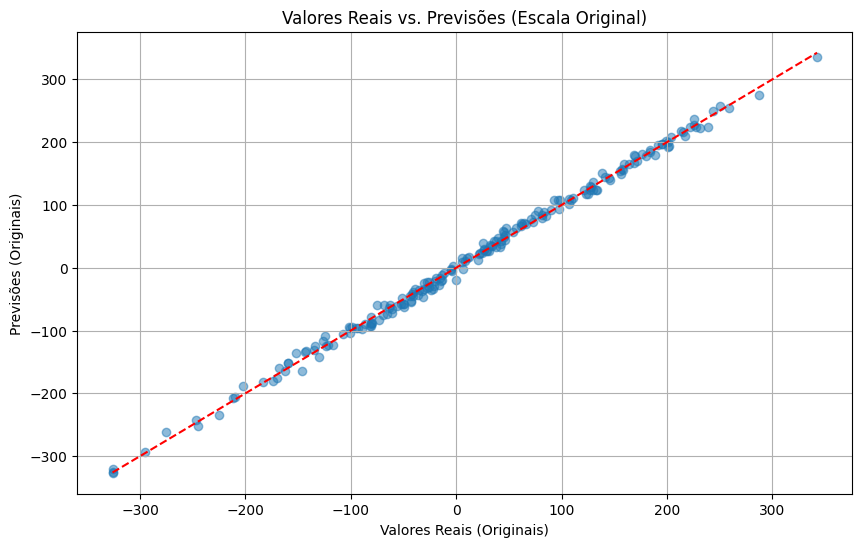

In [13]:

#####################################
# Parte 4: Avaliação do Modelo
#####################################

# Definir o modelo para modo de avaliação
model.eval()

# Desabilitar o cálculo de gradientes para avaliação
with torch.no_grad():
    # Fazer previsões no conjunto de teste
    predictions = model(X_test_tensor)
    
    # Calcular o erro médio quadrático (MSE)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Erro quadrático médio no conjunto de teste: {test_loss.item():.4f}')

# Plotar a curva de perda
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Curva de Perda - Regressão')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.show()

# Visualizar as previsões vs. valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor.numpy(), predictions.numpy(), alpha=0.5)
plt.plot([y_test_tensor.min(), y_test_tensor.max()], 
         [y_test_tensor.min(), y_test_tensor.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.grid(True)
plt.show()

# Reverter a normalização para mostrar os valores originais (opcional)
predictions_orig = scaler_y.inverse_transform(predictions.numpy())
y_test_orig = scaler_y.inverse_transform(y_test_tensor.numpy())

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, predictions_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], 
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Valores Reais (Originais)')
plt.ylabel('Previsões (Originais)')
plt.title('Valores Reais vs. Previsões (Escala Original)')
plt.grid(True)
plt.show()


# TODO
1. Tente modificar a arquitetura da rede adicionando mais camadas ocultas.
2. Experimente diferentes funções de ativação (Sigmoid, Tanh, LeakyReLU).
3. Adicione técnicas de regularização como Dropout para evitar overfitting.
4. Implemente a técnica de early stopping para interromper o treinamento quando não houver melhora.
5. Experimente diferentes otimizadores (SGD, RMSprop).
6. Tente criar um problema de regressão com múltiplas saídas.
7. Use o DataLoader do PyTorch para treinar com mini-batches.
8. Visualize os pesos da rede após o treinamento.
9. Implemente validação cruzada para avaliar melhor o desempenho do modelo.
10. Salve e carregue o modelo treinado usando torch.save() e torch.load().
11. Otimize o modelo usando o Optuna